# 보스턴 주택 가격 예측: 선형 회귀 모델 분석

## 1. Boston Housing Dataset 소개

`sklearn.datasets.load_boston()`을 통해 불러올 수 있는 데이터셋으로, 보스턴 지역의 주택 가격과 관련된 다양한 특성들을 포함하고 있습니다. 
각 컬럼은 주택 가격에 영향을 줄 수 있는 요인들을 나타냅니다. (예: 평균 방 개수, 범죄율 등)

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

# scikit-learn 1.2 버전부터 load_boston 함수가 제거되었습니다.
# fetch_openml을 사용하여 동일한 데이터셋을 불러옵니다.
boston = fetch_openml(name='boston', version=1, as_frame=True, parser='liac-arff')
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### 데이터 특성 (Features)

*   **CRIM**: 자치시(town) 별 1인당 범죄율
*   **ZN**: 25,000 평방피트를 초과하는 거주지역의 비율
*   **INDUS**: 비소매상업지역이 점유하고 있는 토지의 비율
*   **CHAS**: 찰스강에 대한 더미 변수 (강의 경계에 위치한 경우는 1, 아니면 0)
*   **NOX**: 10ppm 당 농축 일산화질소
*   **RM**: 주택 1가구당 평균 방의 개수
*   **AGE**: 1940년 이전에 건축된 소유주택의 비율
*   **DIS**: 5개의 보스턴 직업센터까지의 접근성 지수
*   **RAD**: 방사형 도로까지의 접근성 지수
*   **TAX**: 10,000 달러 당 재산세율
*   **PTRATIO**: 자치시(town)별 학생/교사 비율
*   **B**: 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 의미
*   **LSTAT**: 모집단의 하위계층의 비율(%)

### 타겟 변수 (Target)
*   **PRICE**: 본인 소유의 주택가격(중앙값) (단위: $1000)

## 2. 선형 회귀 모델 훈련

`sklearn.linear_model.LinearRegression()`을 사용하여 선형 회귀 모델을 훈련합니다.

In [2]:
from sklearn.linear_model import LinearRegression

# 특성(X)과 타겟(y) 분리
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X, y)

LinearRegression()

## 3. `model.coef_` 해석

`model.coef_`는 각 특성(feature)이 주택 가격에 미치는 영향을 나타내는 계수(coefficient)입니다.

- **계수가 양수**: 해당 특성 값이 증가할수록 주택 가격이 상승하는 경향이 있습니다.
- **계수가 음수**: 해당 특성 값이 증가할수록 주택 가격이 하락하는 경향이 있습니다.
- **계수의 절댓값**: 절댓값이 클수록 주택 가격에 미치는 영향력이 크다고 해석할 수 있습니다.

In [3]:
# 각 특성의 계수(coefficient) 확인
coefficients = pd.DataFrame({'feature': X.columns, 'coef': model.coef_})
coefficients.sort_values(by='coef', ascending=False)

,feature,coef
5,RM,3.809865
3,CHAS,2.686734
8,RAD,0.306049
1,ZN,0.046420
2,INDUS,0.020559
11,B,0.009312
6,AGE,0.000692
9,TAX,-0.012335
0,CRIM,-0.108011
12,LSTAT,-0.524758


## 4. 결과 분석 및 시각화

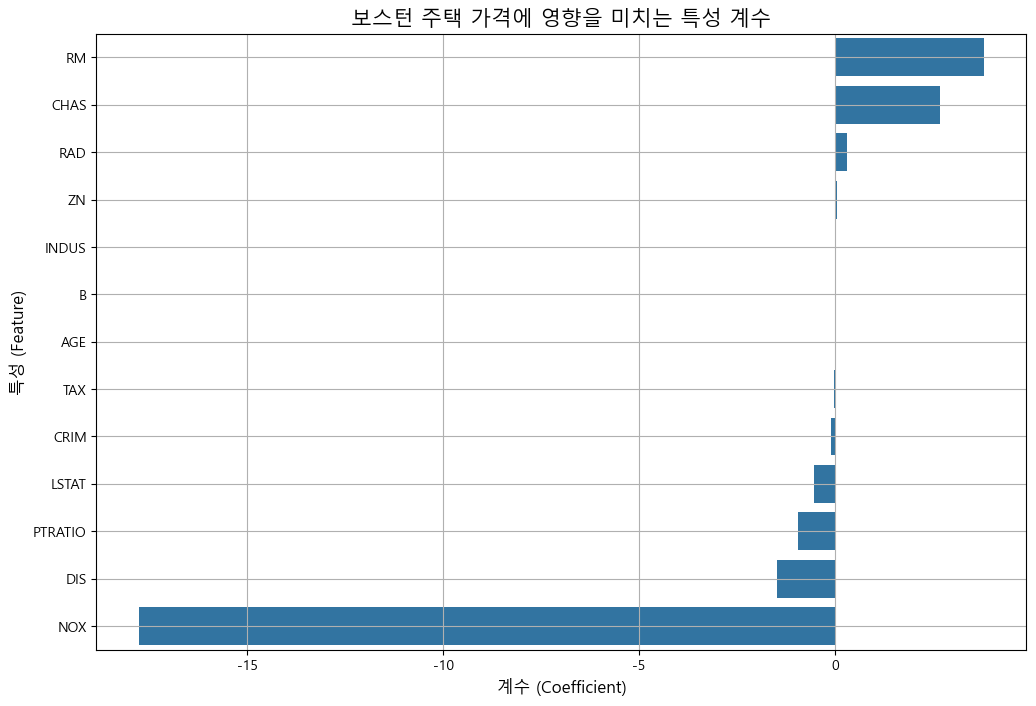

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 부호 깨짐 방지

# 계수 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='coef', y='feature', data=coefficients.sort_values(by='coef', ascending=False))
plt.title('보스턴 주택 가격에 영향을 미치는 특성 계수', fontsize=15)
plt.xlabel('계수 (Coefficient)', fontsize=12)
plt.ylabel('특성 (Feature)', fontsize=12)
plt.grid(True)
plt.show()

### 분석 결과

위 그래프는 각 특성의 계수를 시각적으로 보여줍니다.

#### **가장 긍정적인 영향을 미치는 특성: `RM` (주택 1가구당 평균 방의 개수)**
계수 값이 가장 큰 양수로 나타났습니다. 이는 **방의 개수가 많을수록 주택 가격이 상승**하는 경향이 매우 강하다는 것을 의미합니다. 상식적으로 방이 많을수록 집이 크고, 가격이 비싸다는 사실과 일치하는 결과입니다.

#### **가장 부정적인 영향을 미치는 특성: `NOX` (농축 일산화질소 농도)**
계수 값이 가장 큰 음수로 나타났습니다. 이는 **일산화질소 농도, 즉 공기 오염도가 높을수록 주택 가격이 하락**하는 경향이 매우 강하다는 것을 의미합니다. 쾌적한 주거 환경을 선호하는 경향을 반영하는 결과로 해석할 수 있습니다. 그 뒤를 이어 `DIS` (직업센터까지의 거리), `PTRATIO` (학생/교사 비율) 등이 부정적인 영향을 미치는 것을 볼 수 있습니다.